#### Exploring Helicopter Prison Breaks ####

**Importing Python Libraries**- The libraries that are upload are requests library helps us download data from Wikipedia, while BeautifulSoup parses the HTML to extract relevant information.The datetime module manages date-related data,and pandas allows efficient data manipulation and analysis.For visualization,we use matplotlib and its pyplot interface, with %matplotlib inline to display plots within Jupyter.The defaultdict aids in counting occurrences,and re supports pattern matching through regular expressions. Additionally, unicodedata handles character normalization,and numpy provides tools for numerical computing and statistical calculations.

In [116]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [117]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/116.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table")
table_index = 1
desired_table = tables[table_index]
rows = desired_table.find_all("tr")
header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    if not cells:
        continue
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

df = pd.DataFrame(data, columns=header_row)
print("Header:")
print(header_row, "\n")

print("First 2 rows of Data:")
for row in data[:2]:
    print(row)
df.to_csv("prison.csv", index=False)
#print("\nData saved to 'prison.csv'")

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second J

**Observation**: Extract the data from the source, examine its structure, and convert it into a Pandas DataFrame using pd.DataFrame() for easy analysis.

In [118]:
df=df.drop("Details", axis=1)
pd.set_option('display.max_colwidth', 30)
print(df[:3])

               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


**Observation:** To simplify analysis and focus on relevant data, I removed the redundant 'details' column to reduce noise and improve clarity.

## Temporal Analysis ##
1. How many prison escapes occurred each year? Are there any notable trends or patterns over time?

In [119]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
df['Year'] = df['Date'].dt.year
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
escapes_per_year = df.groupby('Year').size()
print("Prison Escapes per Year:")
print("Year")
print(escapes_per_year.to_string())

Prison Escapes per Year:
Year
Year
1971    1
1973    1
1978    1
1981    2
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    1
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    1
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1


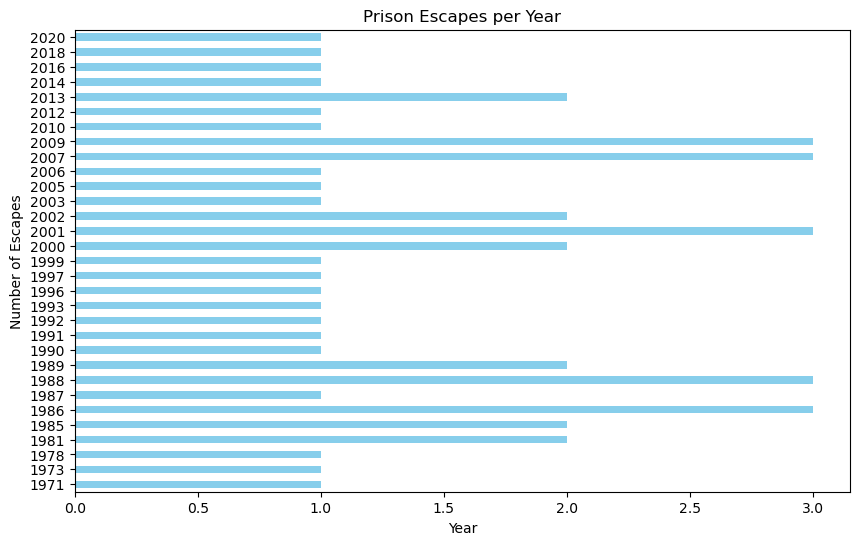

In [120]:
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year',color='skyblue')
plt.show()

**Observation:** The bar plot shows that the highest number of prison escape incidents occurred in the years 1986, 1988, 2001,2008 and 2009.

2. Are there specific months or days of the week when prison escapes are more likely to happen?

In [121]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
escapes_per_month = df.groupby('Month').size()

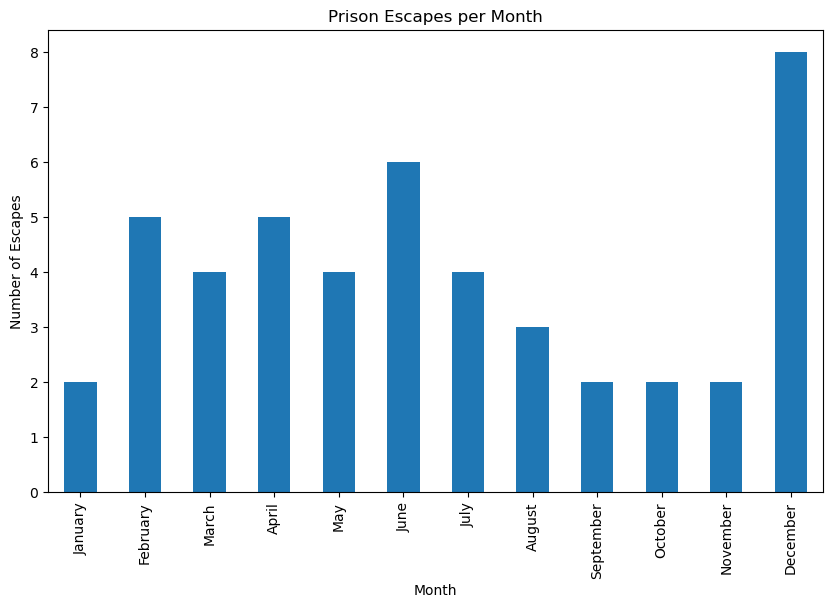

In [122]:
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
escapes_per_day = df.groupby('DayOfWeek').size()
plt.show()

**Obeservation:** The highest number of prison escapes occurs in December, suggesting a peak in escape attempts during that month.

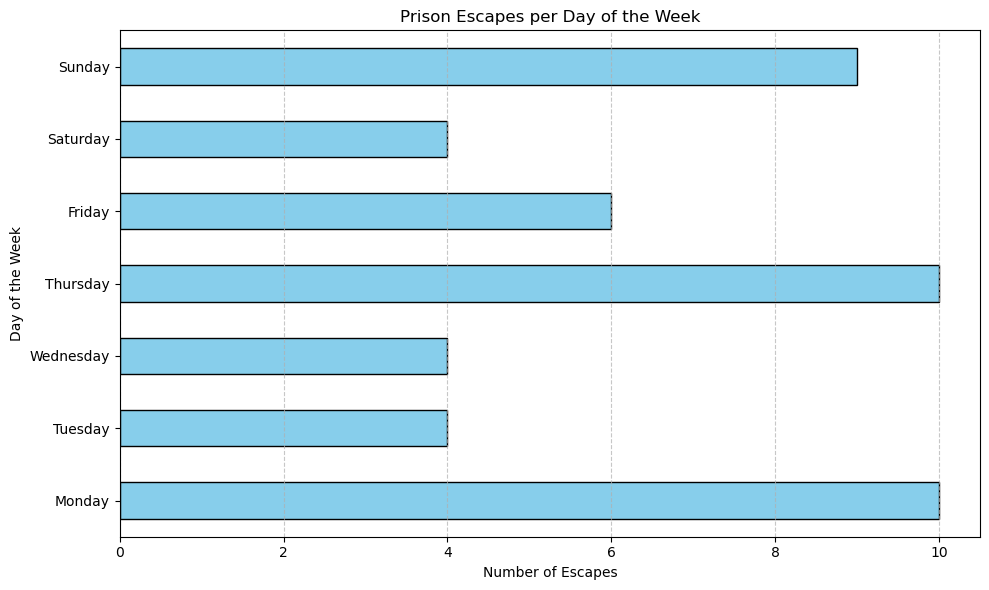

In [123]:
escapes_per_day.index = day_names

escapes_per_day.plot(
    kind='barh',
    figsize=(10, 6),
    xlabel='Number of Escapes',
    ylabel='Day of the Week',
    title='Prison Escapes per Day of the Week',
    color='skyblue',
    edgecolor='black'
)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observation:** December had the highest number of prison escapes by month, while Monday and Thursday showed the highest escape rates by day of the week.

## Geographical Analysis ##
1. Which countries have the highest number of recorded prison escapes?

In [124]:
escapes_per_country = df.groupby('Country').size()
top_countries = escapes_per_country.sort_values(ascending=False)
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))

Countries with the Highest Number of Recorded Prison Escapes:
Country
France            13
United States      8
Greece             4
Belgium            4
Canada             4
Colombia           2
United Kingdom     2
Brazil             2
Chile              1
Australia          1
dtype: int64


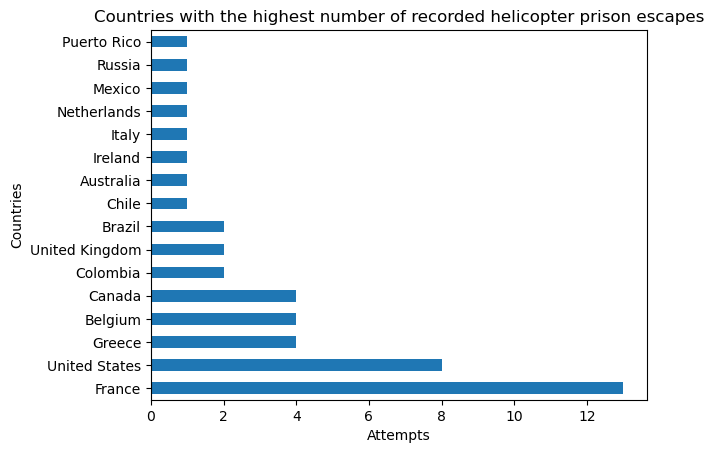

In [125]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

**Observation:** France has the greatest number of recorded prison escapes.

## Success Analysis ##
1. What is the overall success rate of prison escapes in the dataset?

In [126]:
success_rate = df['Succeeded'].value_counts()['Yes']
failure_rate = df['Succeeded'].value_counts()['No']

total_rate = success_rate + failure_rate

success_percentage = success_rate*total_rate / 100
failure_percentage = failure_rate*total_rate / 100

print(f"Total: {total_rate}\nSuccess: {success_rate}\nFailure: {failure_rate} ")

Total: 47
Success: 36
Failure: 11 


**Observastion:** Out of 47 prison escape attempts, 36 were successful while 11 ended in failure.

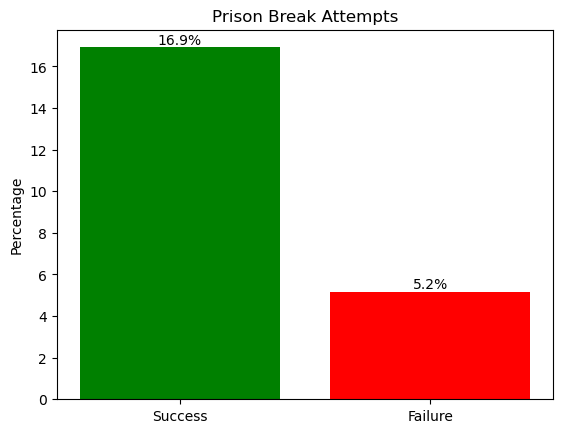

In [127]:
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['green','red']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

plt.show()

**Observation:** Analyzing the success rate of prison escapes helps identify weaknesses in security and the need for better measures. A high success rate means security might be lacking, posing risks to public safety. A low success rate shows that security systems are working well to prevent escapes. However, the data might not include all escape attempts, so the success rate may not be fully accurate. Understanding this helps authorities improve prison safety and protect the public.

## Escapee Analysis ##
1. What is the average number of escapees per incident?

In [128]:
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()

print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")

Average Number of Escapees per Incident:
1.02


**Observation:** The average number of escapees per incident is very close to one, indicating that most escape attempts involve only a single prisoner.

2. Who are the hardened escape inmates?

In [129]:
escaped_individuals = df[df['Escapee(s)'].notnull()].copy()

escaped_individuals['Cleaned Escapee(s)'] = escaped_individuals['Escapee(s)'].str.replace(r'[\n;]', ',', regex=True)

canonical_names = {
    'vassilis paleokostas': ['vassilis paleokostas', 'vasilis paleokostas', 'vassilis paleokostasalket rizai', 'vasilis paleokostasalket rizai'],
    'pascal payet': ['pascal payet'],
    'michel vaujour': ['michel vaujour'],
    # Add more if you want to whitelist
}

all_aliases = [alias for aliases in canonical_names.values() for alias in aliases]

def normalize_name(name):
    name = name.strip().lower()

    name = re.sub(r'(paleokostas)(?=[a-z])', r'paleokostas, ', name)

    name = re.sub(r',\s+', ',', name)

    for canonical, aliases in canonical_names.items():
        if name in aliases:
            return canonical

    close = get_close_matches(name, all_aliases, n=1, cutoff=0.85)
    if close:
        for canonical, aliases in canonical_names.items():
            if close[0] in aliases:
                return canonical

    return name
all_escapees=[]
for escapee_list in escaped_individuals['Cleaned Escapee(s)']:
    parts=escapee_list.split(',')
    for part in parts:
        normalized=normalize_name(part)
        sub_parts=[x.strip() for x in normalized.split(',') if x.strip()]
        all_escapees.extend(sub_parts)
escapee_counts=pd.Series(all_escapees).value_counts()

persistent_escapees=escapee_counts[escapee_counts > 1]

persistent_escapees=persistent_escapees[persistent_escapees.index.isin(canonical_names.keys())]

persistent_escapees.index=persistent_escapees.index.str.title()

print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
Vassilis Paleokostas    2
Pascal Payet            2
Michel Vaujour          2
Name: count, dtype: int64


**Observation:** Some inmates use clever methods like tunneling, fake IDs, and bribing guards to escape prison. A few brave ones try a daring method—escaping by helicopter. Three inmates—Pascal Payet, Michel Vaujour, and Vassilis Paleokostas—each tried this risky escape twice. We want to find out if they succeeded or were caught again. Our analysis looks at when and where these helicopter escapes happened. Join us as we explore their bold attempts and the efforts to stop them.

In [130]:
pd.set_option('display.max_colwidth', None)
temp_df=df.dropna(subset=['Escapee(s)']).copy()
temp_df['Escapee(s)']=temp_df['Escapee(s)'].str.replace('\n', ',').str.replace(';', ',')
all_escapees=[]
for names in temp_df['Escapee(s)']:
    fixed=re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', names)
    split_names=[n.strip() for n in fixed.split(',') if n.strip() and n.strip()!= '—']
    all_escapees.extend(split_names)
counts=pd.Series(all_escapees).value_counts()
recurrent=counts[counts > 1].index.tolist()
pattern='|'.join([re.escape(name) for name in recurrent])
result=temp_df[temp_df['Escapee(s)'].str.contains(pattern, case=False, na=False)]
cols=['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
result=result[cols]
print("The Unstoppable: Recurrent Escapees")
print(result.to_string(index=False))

The Unstoppable: Recurrent Escapees
    Escapee(s) Succeeded                    Prison name       Date Country
Michel Vaujour       Yes             Prison de la Santé 1986-05-26  France
Michel Vaujour        No Touraine Central Prison, Tours 1993-06-17  France
  Pascal Payet       Yes                  Luynes prison 2001-01-19  France
  Pascal Payet       Yes                  Grasse prison 2007-07-15  France


**Observation:** Three inmates—Vassilis Paleokostas from Greece, along with Michel Vaujour and Pascal Payet from France—each made multiple attempts to escape prison using helicopters. Paleokostas successfully escaped twice from Greek prisons, in 2006 and 2009, before being recaptured. Vaujour tried two helicopter escapes in France during the 1980s and 1990s, succeeding only once. Payet also managed two helicopter escapes in France, in 2001 and 2007, but was eventually caught. Their bold escapes revealed flaws in prison security and prompted reforms.

### Conclusion:
Through a detailed analysis of the helicopter prison escape dataset, I uncovered valuable patterns and insights about these daring incidents. The data included 48 escape attempts with varying outcomes, locations, and timings. By examining trends over the years, as well as specific months and days, I identified fluctuations that suggest escape attempts are influenced by dynamic factors rather than occurring randomly.

Geographical analysis revealed countries with the highest number of helicopter escapes, highlighting regions where prison security may need improvement. The success rate analysis showed that while many attempts failed, a significant number succeeded, exposing vulnerabilities in current security systems. Notably, the cases of Vassilis Paleokostas, Michel Vaujour, and Pascal Payet—who each attempted multiple helicopter escapes—demonstrate extraordinary determination and challenge the effectiveness of prison containment.

In conclusion, this study offers a deeper understanding of helicopter prison escapes and emphasizes the need for ongoing advancements in prison security. The insights gained provide a foundation for future research and policy development aimed at strengthening correctional systems. By learning from these events, authorities can enhance safety measures, reduce escape risks, and work towards a more secure and effective justice system that balances security with rehabilitation.